# Home task : KNN classification

1. iris dataset
- load iris dataset
- split to train and test
- train KNN classifiers for different K
- choose the best K determined on test set

2. synthetic dataset
- generrate synthetic dataset
- split to train and test
- train KNN regressors for different K
- choose the best K determined on test set
- visualize the decision boundary

### Iris dataset

In [27]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [28]:
k_best = None # 'compute the best k'
score_best = None #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = None , score = None


Split and train

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 20)
values = []  

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    values.append(score)

k_best = k_values[np.argmax(values)]
score_best = values[k_best-1]
print (f"The best K = {k_best}. Score = {score_best}")

The best K = 5. Score = 0.9666666666666667


### Synthetic dataset

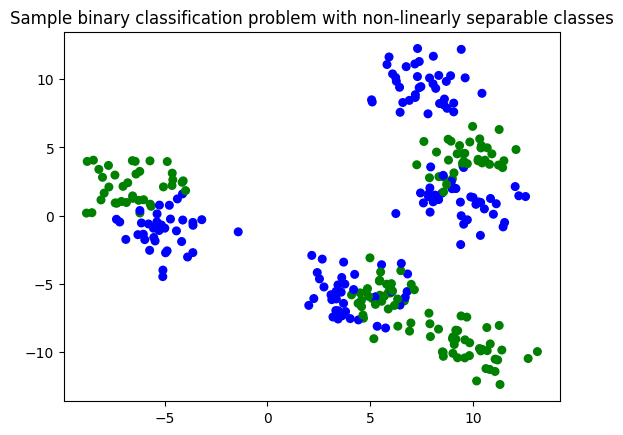

In [32]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [33]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=2021)

In [34]:
# train KNN regressors for different K
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [1, 3, 5, 7, 9]
mse_values = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

In [35]:
# choose the best K determined on test set
best_k = k_values[np.argmin(mse_values)]
print(f"Best K: {best_k}")

Best K: 3


In [36]:
# training a KNN regressor with the best K
best_knn_reg = KNeighborsRegressor(n_neighbors=best_k)
best_knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

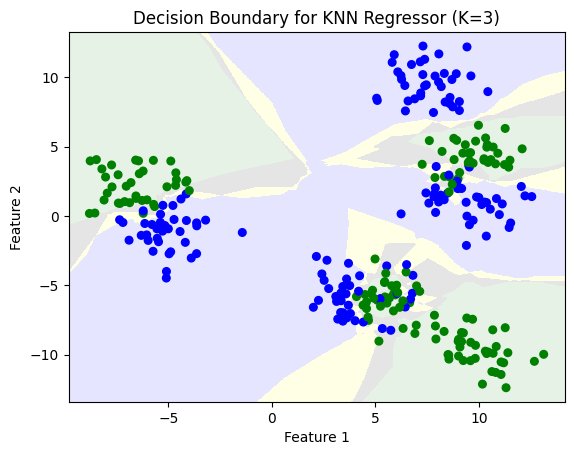

In [37]:
# visualize the decision boundary
h = .02
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_knn_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_bold, alpha=0.1)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.title(f'Decision Boundary for KNN Regressor (K={best_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()